### Stock Market Prediction And Forecasting Using Stacked LSTM

In [3]:
#!pip install pandas_datareader
import pandas_datareader as pdr

In [4]:
#Data collection
#key = '0311824c9ca43c69f42be8427039b67eb919922c'
#df = pdr.get_data_tiingo('AAPL',api_key = key)

In [1]:
import yfinance as yf

df = yf.download('AAPL', start='2020-01-01', end='2025-01-01')


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [2]:
df.to_csv('AAPL.csv')

In [3]:
import pandas as pd
df = pd.read_csv('AAPL.csv')

In [4]:
df.head()

,Price,Close,High,Low,Open,Volume
0,Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
1,Date,NaN,NaN,NaN,NaN,NaN
2,2020-01-02,72.71607971191406,72.77660582997152,71.46681974859514,71.7210264890596,135480400
3,2020-01-03,72.00912475585938,72.7717522953066,71.78396939069293,71.94133580542943,146322800
4,2020-01-06,72.58290100097656,72.62163859417052,70.87606782262263,71.12785848416316,118387200


In [9]:
df = df.drop([0,1],axis = 0)

In [17]:
df1 = df.reset_index()['Close']

In [18]:
df1[10:]

10       76.32098388671875
11       77.16594696044922
12       76.64299011230469
13       76.91657257080078
14       77.28699493408203
               ...        
1253    257.91644287109375
1254     258.7355041503906
1255    255.30929565429688
1256     251.9230194091797
1257     250.1449737548828
Name: Close, Length: 1248, dtype: object

In [20]:
df1.shape

(1258,)

In [31]:
df1 = df1.astype('float64')

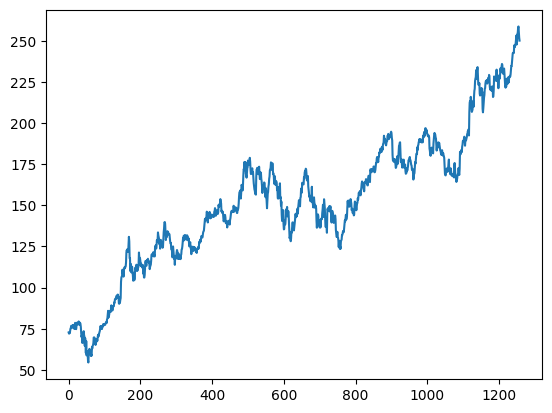

In [33]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [35]:
### LSTM are sensitive to the scale of the data , so we apply MinMax scaler
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))


In [45]:
df1.shape

(1258, 1)

In [42]:
df1.shape

(1258, 1)

In [46]:
# Splitting dataset into training set and test set
train_size = int(len(df1)*0.65)
test_size = len(df1)-train_size
train_data,test_data = df1[0:train_size,:],df1[train_size:len(df1),:1]


In [47]:
train_size,test_size

(817, 441)

In [49]:
#conver an array of valuea into a dataset matrix
def create_dataset(dataset,time_step=1):
    dataX , dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]  
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)

In [50]:
#reshape int X=t , t+1,t+2 , t+3 and Y = t+4
time_step = 99
X_train,y_train = create_dataset(train_data,time_step)
X_test,y_test = create_dataset(test_data,time_step)

In [51]:
X_test.shape,y_test.shape

((341, 99), (341,))

In [52]:
#reshape input to be [samples , time steps,features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [53]:
### Crate the lstm model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import LSTM

In [54]:
model = Sequential()
model.add(LSTM(50,return_sequences = True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

2025-03-11 13:19:50.434592: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/harry/Documents/Code/Data_Science/DeepLearning/.venv_tf/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [55]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs =100,batch_size=64,verbose= 1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 4.0320e-04 - val_loss: 7.0628e-04
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 3.7862e-04 - val_loss: 0.0012
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - loss: 3.9368e-04 - val_loss: 0.0014
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - loss: 4.4398e-04 - val_loss: 9.7695e-04
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - loss: 4.1212e-04 - val_loss: 0.0013
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - loss: 4.2688e-04 - val_loss: 0.0021
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 4.7682e-04 - val_loss: 9.0655e-04
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - loss: 3.3318e-04 - val_loss: 4.1390e-04
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - loss: 4.2090e-04 - val_loss: 6.0483e-04
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - loss: 3.8984e-04 - val_loss: 0.0017
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 3.6042e-04 

In [57]:
## Lets do the prediction and check performance metrics
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [59]:
##Transformback to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [60]:
## Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

137.0501603290389

In [61]:
### test Data rmse
math.sqrt(mean_squared_error(y_test,test_predict))

195.54660557219347

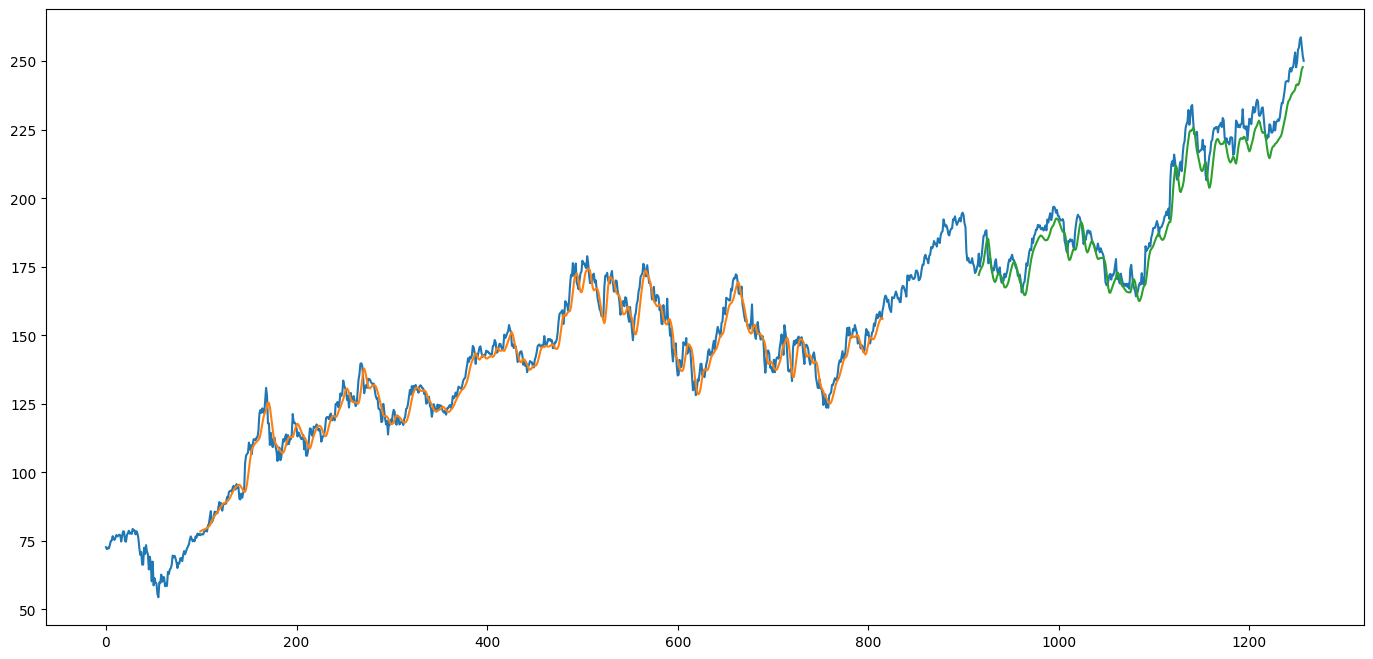

In [68]:
### Plotting 
#shift train prediction for plotting
look_back = 99
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:] = train_predict

#shift test predictions for plotting
testPredictPlot =np.empty_like(df1)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:] = test_predict

#plot baseline and predicted
plt.figure(figsize=(17,8))
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [69]:
# Predicting the next 100 daya
len(test_data)

441

In [70]:
X_input = test_data[341:].reshape(1,-1)
X_input.shape

(1, 100)

In [71]:
temp_input = list(X_input)
temp_input = temp_input[0].tolist()

In [87]:
#demonstrate prediction for next 10 days

lst_output=[]
n_steps=100
i=0
while(i<30):
    if(len(temp_input)>100):
        X_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,X_input))
        X_input = X_input.reshape(1,-1)
        X_input = X_input.reshape((1,n_steps,1))

        yhat = model.predict(X_input,verbose = 0 )
        print('{} day output {}'.format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]

        lst_output.extend(yhat.tolist())
        i+=1
    else:
        X_input = X_input.reshape((1,n_steps,1))
        yhat = model.predict(X_input,verbose = 0)

        temp_input.extend(yhat[0].tolist())

        lst_output.extend(yhat.tolist())
        i+=1

print(lst_output)

0 day input [0.82487159 0.82130603 0.84455555 0.84323534 0.82988636 0.82988636
 0.83423822 0.84939642 0.83365143 0.84841846 0.84968975 0.85321035
 0.85086333 0.85746443 0.87213362 0.88284212 0.88220648 0.89394186
 0.9049926  0.91995518 0.92171548 0.92186218 0.92088422 0.94000312
 0.94499062 0.93873176 0.94591973 0.94675092 0.96098001 0.97291094
 0.94635975 0.95486785 0.97784967 0.98166366 0.99599061 1.
 0.98322834 0.96665216 0.95794843 0.92130709 0.89384657 0.8678717
 0.84491521 0.82453042 0.80621105 0.78937614 0.77353835 0.7583732
 0.74372292 0.72956502 0.71596825 0.70304406 0.69091249 0.67967379
 0.66939735 0.66011691 0.65183252 0.64451867 0.6381309  0.632613
 0.62790316 0.62393737 0.62065238 0.61798632 0.61587989 0.61427569
 0.61311871 0.61235565 0.61193484 0.61180645 0.61192298 0.612239
 0.61271191 0.61330169 0.61397189 0.61468893 0.6154229  0.61614728
 0.61683905 0.61747843 0.61804879 0.61853689 0.61893177 0.61922586
 0.61941367 0.61949182 0.61945903 0.61931598 0.61906481 0.618709

In [88]:
lst_output[2]

[0.6076023578643799]

In [89]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [90]:
len(df1)

1258

In [91]:
df3 = df1.tolist()
df3.extend(lst_output)

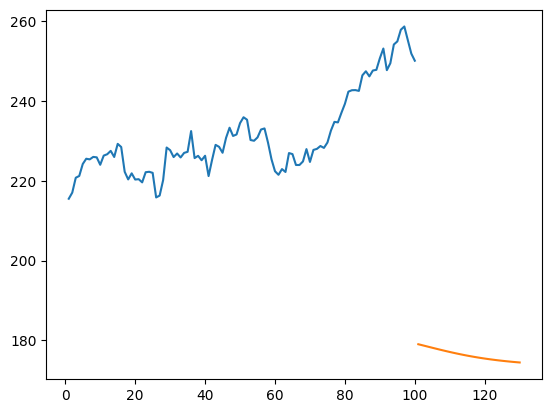

In [92]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

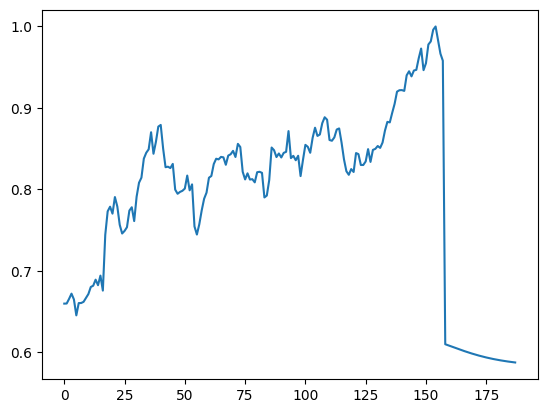

In [93]:
df3 = df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1100:])